## 3-8 일반화 기법


### 1. 일반화 기법
#### 하이퍼 파라미터 최적화(Hyper-Parameter Optimization)
- 최적의 일반화 성능을 지닌 하이퍼 파라미터의 조합을 탐색
#### 속성 선택(Feature Selection)
- 불필요한 특성 제거
#### 클래스 불균형 대응
- 특정 클래스의 치우침 해소를 통한 지표 향상

### 2. 하이퍼 파라미터 탐색
#### 그리드 서치 (Grid Search)
- 주어진 하이퍼 파라미터 리스트에서 조합 가능한 경우의 수를 구함

> max_depth={3, 5, 10},  n_estimator={100, 200}
> 
> $\Rightarrow$ {(3, 100),(5, 100),(10, 100), (3, 200),(5, 200),(10, 200)}
- 모든 하이퍼 파라미터 조합으로 검증을 수행 하고, 최적의 성능을 보인 모델 선택

#### 랜덤 서치(Random Search)

- 주어진 하이퍼 파라미터 리스트에서 조합 가능한 경우의 수를 구함

> max_depth={3, 5, 10},  n_estimator={100, 200}
> 
> $\Rightarrow$ {(3, 100),(5, 100),(10, 100), (3, 200),(5, 200),(10, 200)}

- 모든 하이퍼 파라미터 조합 중에서 지정한 횟수만큼 선택하여 검증을 수행 하고 최적의 모델 선택

#### 그리드 서치 vs 랜덤 서치

|   | 그리드 서치<br/>(Grid Search) | 랜덤 서치<br/>(Random Search) |
| --- | --- | --- |
| 탐색 방식 | 전수조사 | 무작위 선택 조사 |
| 탐색 횟수 | 조합 수 | 시도 횟수 |
| 최적화 정확도 | 주어진 조합에서 가장 좋은 조합 보장 | 가장 좋은 조합 보장 불가<br/>조합의 수가 많아질수록, 시도 횟수가 적을수록 최적의 조합을 발견할 확률 감소 |
| 연산량 | 탐색 범위가 늘어날수록 폭발적으로 증가 | 시도 횟수에 비례 |


### 3. 속성 선택
#### Filter 방식: 각 속성과 타깃 간의 관계성을 측정
- 각종 통계량 활용: 정보 이득(Information Gain), VIF(Variance Inflation factor)...
- 가설 검정의 p-value 나 통계량 활용

| 변수 |   | 구분 | 분석 방법 |
| --- | --- | --- | --- |
| 수치형 | 이진 범주형 | 모수적 | t –검정 |
|   |   | 비모수적 | Mann-Whitney U |
| 수치형 | 수치형 | 모수적 | Pearson 상관도 |
|   |   | 비모수적 | Spearman 상관도 |
| 수치형 | 범주형 | 모수적 | 일원 분산분석 |
|   |   | 비모수적 | Kruskal-Wallis |
| 범주형 | 범주형 | 비모수적 | 카이제곱 독립성 검정 |


#### Wrapper 방식: 속성 부분 집합에 대한 Wrapper 모델의 검증 성능 기준
- 완전 탐색(Exhaustive Search): 가능한 모든 조합의 속성을 탐색
- 순차적 선택법: 단계별 속성을 하나씩 추가 또는 제거

| 방식 | 수행 |
| --- | --- |
| 전진 선택법<br/>Forward Selection | 매 단계마다 선택되지 않은 속성 중에서, 추가 시 성능 향상이 큰 속성 추가 |
| 후진 제거법<br/>Backward Elimination | 매 단계마다 선택된 속성 중에서, 제거 시 성능 향상이 큰 속성 제거<br/>※ 선형 회귀 모델 사용 시, 속성의 수가 표본 수보다 많을 경우 사용 불가 |
| 단계적 선택<br/>Stepwise Selection | 추가와 제거를 모두 수행, 동일 과정이 반복되지 않게 유의<br/>- 전진 선택 시, 각 단계에서 속성 제거 시도: 개선 시 제거 → 단계적 전진 선택법<br/>- 후진 제거 시, 각 단계에서 속성 추가 시도: 개선 시 추가 → 단계적 후진 제거법 |

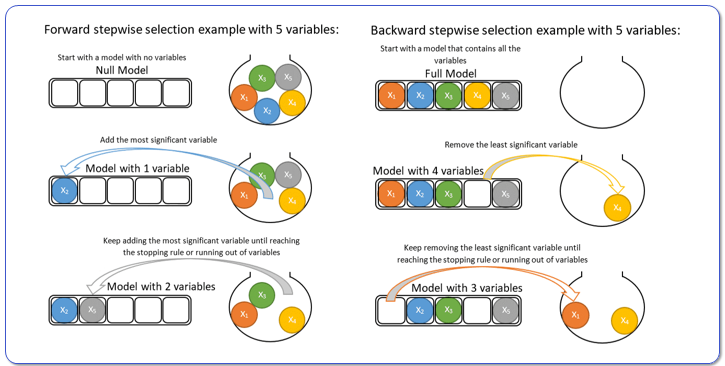

#### Wrapper 방식

- 재귀적 제거법(Recursive Feature Elimination)
> 모델 학습 결과에서 보인 속성별 중요도를 나타내는 지표를 기준으로 각 단계에서 가장 중요도가 낮은 속성을 하나씩 제거


1. $X = \{\mathbf{x}_1, \mathbf{x}_2, ... \mathbf{x}_k\}$

2. X를 사용하여 모델 학습

3. 모델의 학습 결과에서 각 속성별 중요도 측정

4. 중요도가 낮은 속성 제거

5. 종료 조건을 충족할 때까지, 2부터 반복

Ex) 의사 결정 나무의 속성 중요도, 선형 회귀 모델 계수의 절대값, ...

#### 임베디드 방식(Embedded Feature Selection): 학습 과정에서 속성이 선택됨
- Lasso 모델: L1 규제에 의해 계수가 0 이 되어 속성의 영향력 손실
- 의사 결정 나무: 분기 선택 과정에 의해 선택

#### 속성 선택
- 정리

|   | Filter 방식 | Wrapper 방식 | Embedded 방식 |
| --- | --- | --- | --- |
| 기준 | 통계적 척도 | 모델 성능 | 모델 학습 과정 |
| 장점 | 빠르고 단순 | 실제 성능을 기준으로 최적화 | 성능 반영 + 효율성 |
| 단점 | 속성의 상호작용 무시<br/>성능과 괴리가 있을 여지가 있음 | 계산량이 큼 | 모델 의존적 |


### 4. 클래스 불균형 대응

#### 클래스 불균형에 민감한 지표: 소수 클래스의 구분력에 따라 성능의 편차가 큼

- f1 score

$\text{f1 score}=\frac{2𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛×𝑅𝑒𝑐𝑎𝑙𝑙}{𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙}$

- 매크로 Recall

$\text{𝑀𝑎𝑐𝑟𝑜 𝑅𝑒𝑐𝑎𝑙𝑙}=\frac{1}{𝐾}\sum_{𝑖=1}^𝐾\frac{𝑇𝑃_𝑖}{𝑇𝑃_𝑖+𝐹𝑁_𝑖}$

$TP_i$: 클래스 i 에 대한 True Positive

$FP_i$: 클래스 i 에 대한 False Positive

$FN_i$: 클래스 i 에 대한 False Negative


#### 클래스 가중치
- 모델 학습 단계에서 소수 클래스의 가중치를 높임
- 높아진 가중치에 의해 소수 클래스가 더 판별이 되도록 학습


#### 클래스 분류 임계점 조정
- 클래스 분류 임계점 조정을 통해 소스 클래스에 균형 부여
- 높아진 가중치에 의해 소수 클래스에 균형 부여

#### Over Sampling 과 Under Sampling
- Over Sampling: 소수 클래스의 표본을 늘림
>  Random Over Sampling: 대상 클래스의 임의의 표본을 뽑아 늘림 → 복제 발생
- Under Sampling: 다수 클래스의 표본을 줄임
> Random Under Sampling: 대상 클래스의 임의의 표본 제거→ 정보 손실 위험

#### Over Sampling 과 Under Sampling 비교

|   | 오버 샘플링<br/>(Over Sampling) | 언더 샘플링<br/>(Under Sampling) |
| --- | --- | --- |
| 장점 | 정보 손실 없음<br/>소수 클래스 표현력 향상 | 계산 속도 증가<br/>학습 데이터가 작아짐 → 빠른 학습 |
| 단점 | 과적합 위험 (특히 단순 복제 시)<br/>연산량 증가 | 정보 손실 가능성<br/>데이터 대표성 손상 가능 |
| 모델에 미치는 영향 | 복잡한 결정 경계 가능<br/>소수 클래스의 결정 경계 확장 | 단순화된 경계 유도 |
| 데이터 분포에 미치는 영향 | 소수 클래스 분포의 인위적 확장<br/>소수 클래스 분포 왜곡 | 다수 클래스 분포 왜곡 |


#### Over Sampling 의 효과
- 4

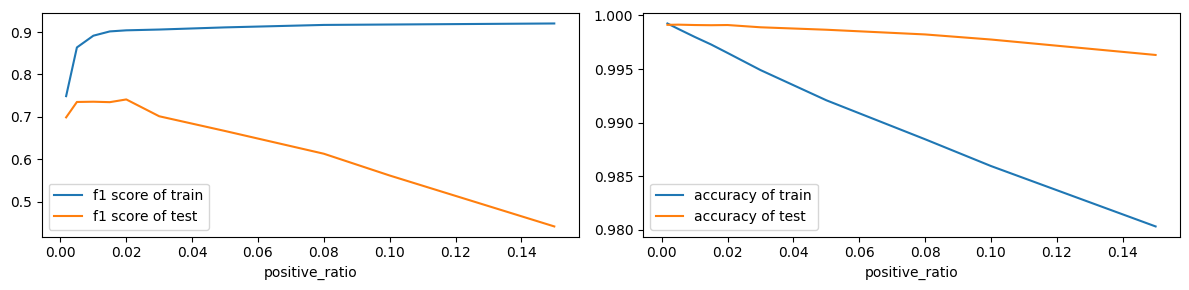
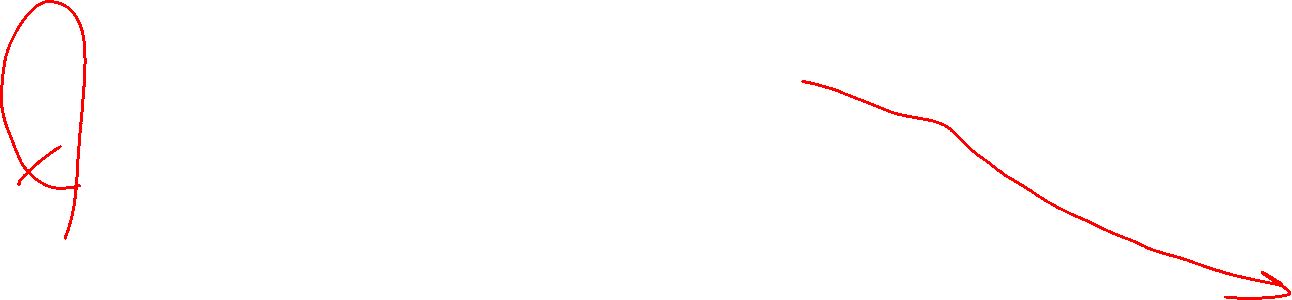


#### Under Sampling 의 효과
- 4

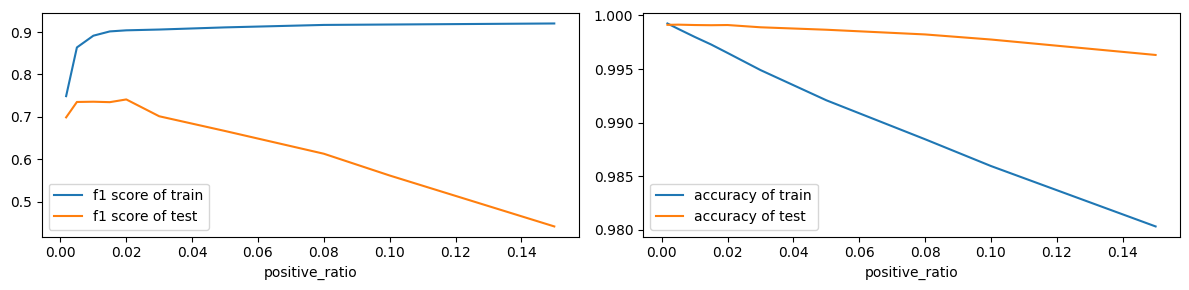
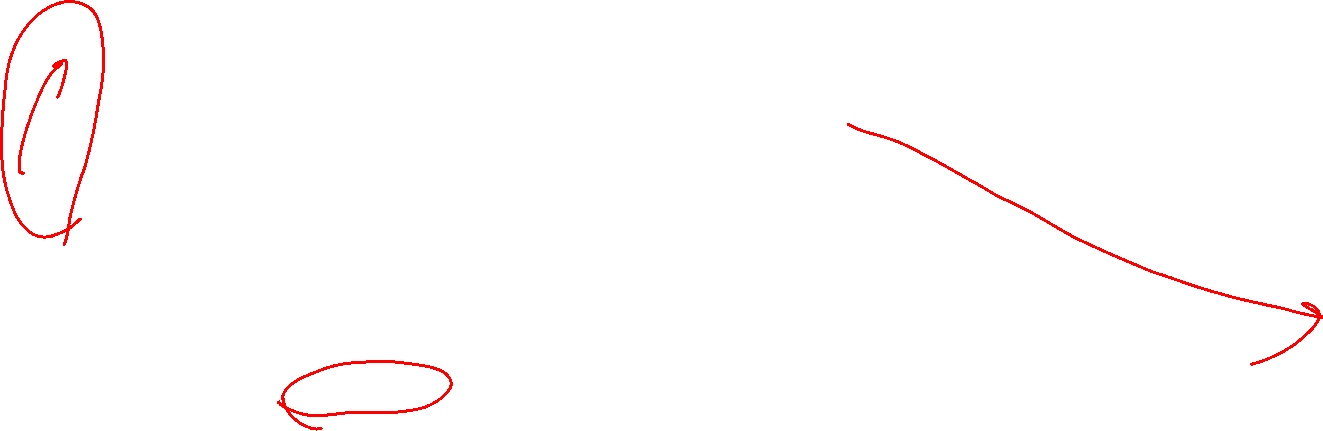
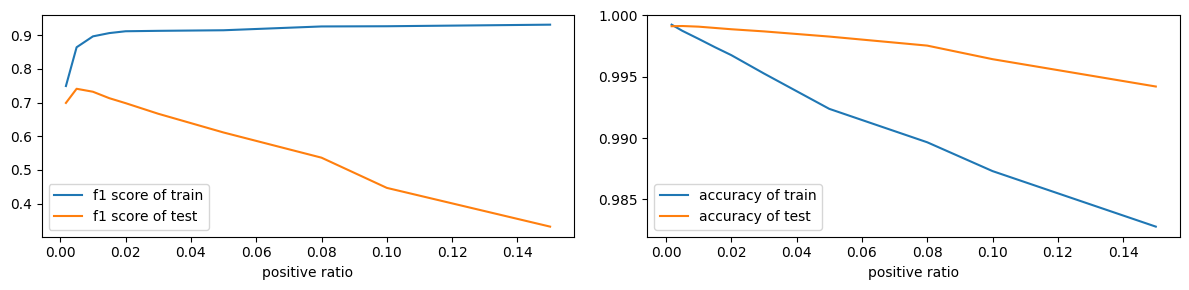


#### SMOTE(Synthetic Minor Over-Sampling Technique)

- 1. 대상 클래스의 임의 데이터 포인트 x 를 선택
- 2. k 개의 최근접 이웃 중 하나를 선택 – $x_{neighbor}}$
> $𝐱_{𝑠𝑚𝑜𝑡𝑒}=𝐱+𝛿(𝐱_{neighbor}−𝐱)$
>
> $𝛿 \sim 𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,1)$
- 3. x smote 추가, 지정한 수만큼 뽑힐 때까지 1 부터 반복

- Smote 결과 분석

|   | 설명 |
| --- | --- |
| 장점 | 데이터 다양성 증가 |
| 단점 | 노이즈 증폭 가능성<br/>고차원 공간에서 효과 감소 |

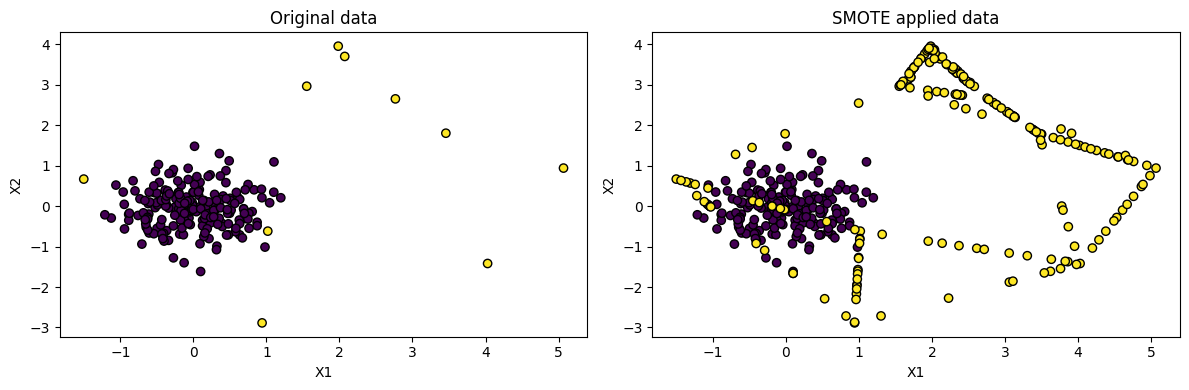

#### ADASYN(Adaptive Synthetic Sampling Approach)

- 주변의 다수 클래스에 맞춰 샘플링 수를 조정
1. 각 대상 클래스 샘플별 샘플링 개수 할당

> $𝑔_{i}=\frac{𝑟_𝑖}{\sum_𝑗𝑟_𝑗 𝐺$
>
> {𝑟_i}:{𝐱_𝐢} 주변 k 개의 이웃 중 다수 클래스의 비율
> 
> $𝐆$: 전체 생성할 샘플 수

2. 각 데이터 포인트 – x i 에 대해 gi 만큼 아래 과정 반복

> k 개의 최근접 이웃 중 하나를 선택 – x_{neighbor}
> 
> $𝐱_{adasyn}=𝐱+\delta(𝐱_{neighbor}−𝐱)$
>
> $𝛿~𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,1)$
> 
> x_{adasyn} 추가

- 장점: 분류가 어려운 지점에 소수 클래스 집중
- 단점
> 노이즈 샘플을 더 많이 합성시킬 수 있음
> 
> 고차원 공간에서 효과 감소

#### Under Sampling
- Tomek’s Link 알고리즘
> 서로 다른 클래스에 속해 있으면서, 서로가 서로의 최근접 이웃인 경우
> 
> → 클래스 분류에 혼동을 일으킬 가능성이 높음
> 
> → Under Sampling 대상이 되는 클래스의 데이터 포인트 제외
>
> 장점: 경계선 정제
> 
> 단점: 데이터 손실, 고차원 공간에서 효과 감소